In [1]:
import numpy as np
import gpflow
import tensorflow as tf
import tensorflow_probability as tfp
from wishart_likelihood import Wishart
import matplotlib.pyplot as plt
from utils import plot_cov2d
tfd = tfp.distributions


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
df = 10
N = 200

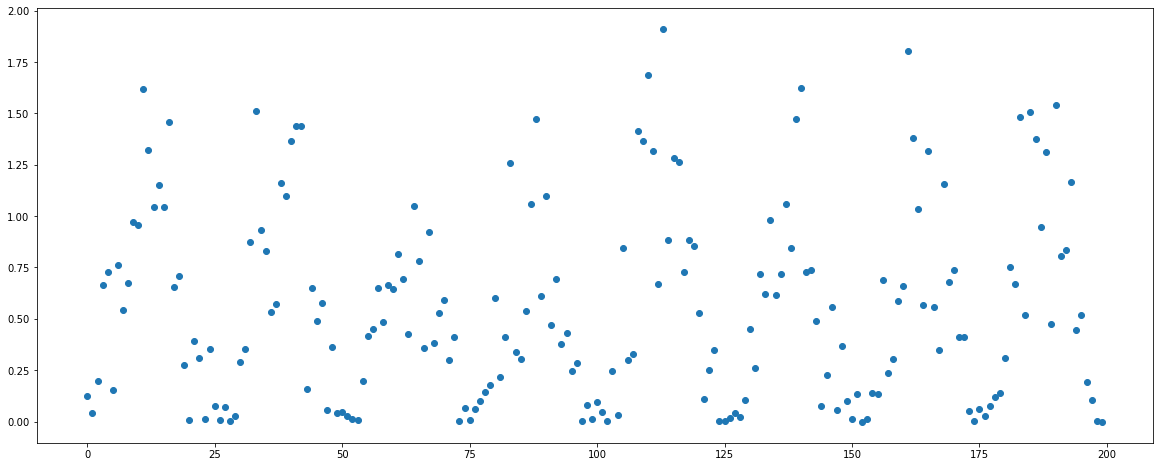

In [3]:
np.random.seed(0)
X = np.arange(N, dtype=float)[:, None]
Y = (np.sin(X/8) + 0.2 * np.random.randn(len(X), 1)) ** 2
plt.figure(figsize=(20, 8))
plt.scatter(X, Y)

In [4]:
M = N // 20
Z = X[np.random.choice(N, M, replace=False)]

In [ ]:
m = gpflow.models.VGP(X, Y, kern=gpflow.kernels.SquaredExponential(1), likelihood=gpflow.likelihoods.Gamma())

In [5]:
m = gpflow.models.VGP(X, Y, kern=gpflow.kernels.SquaredExponential(1), likelihood=Wishart(df, 1), num_latent=df)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
print(m.as_pandas_table())
print(m.compute_log_likelihood())

                           class prior   transform  trainable           shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True              ()   
VGP/kern/variance      Parameter  None         +ve       True              ()   
VGP/q_mu               Parameter  None      (none)       True       (200, 10)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (10, 200, 200)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                                1.0  
VGP/kern/variance                                                    1.0  
VGP/q_mu               [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
VGP/q_sqrt             [[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
-2381.899392761654


In [7]:
opt = gpflow.training.ScipyOptimizer()
opt.minimize(m)

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 418.730678
  Number of iterations: 11
  Number of functions evaluations: 21


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 418.730678
  Number of iterations: 11
  Number of functions evaluations: 21


In [ ]:
opt = gpflow.train.AdamOptimizer(0.01)
opt.minimize(m)

In [8]:
print(m.as_pandas_table())
print(m.compute_log_likelihood())

                           class prior   transform  trainable           shape  \
VGP/kern/lengthscales  Parameter  None         +ve       True              ()   
VGP/kern/variance      Parameter  None         +ve       True              ()   
VGP/q_mu               Parameter  None      (none)       True       (200, 10)   
VGP/q_sqrt             Parameter  None  LoTri->vec       True  (10, 200, 200)   

                       fixed_shape  \
VGP/kern/lengthscales         True   
VGP/kern/variance             True   
VGP/q_mu                      True   
VGP/q_sqrt                    True   

                                                                   value  
VGP/kern/lengthscales                                 1.1269782084859863  
VGP/kern/variance                                     0.0519644450891174  
VGP/q_mu               [[0.0127732871433713, 0.011387596368961193, -0...  
VGP/q_sqrt             [[[0.6411923879590608, 0.0, 0.0, 0.0, 0.0, 0.0...  
-420.8181369790995


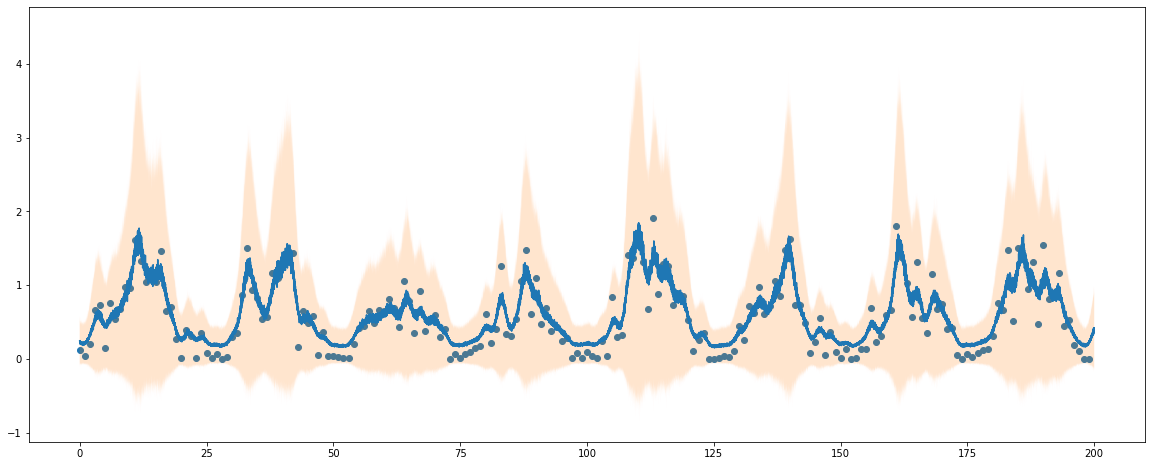

In [9]:
Xpred = np.linspace(0, N, N * 200)[:, None]
plt.figure(figsize=(20, 8))
plt.scatter(X, Y)
Ypred, Var = m.predict_y(Xpred)
plt.plot(Xpred, Ypred)
plt.fill_between(Xpred.flat, (Ypred + 2 * np.sqrt(Var)).flat, (Ypred - 2 * np.sqrt(Var)).flat, alpha=0.2)